# Student Performance Indicator

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

Show Top 5 and Last 5 records

In [3]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
-  parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's - degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dataset

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values in the dataset

### 3.3 Check data types

In [7]:
# Check null and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of dataset

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math_score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading_score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing_score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


### Insights

- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading again much higher = 17

### 3.6 Exploring Data

In [10]:
for col in df.select_dtypes(include= 'object').columns:
    print(f"Categories in '{col}' variable:     ",end=" " )
    print(df[col].unique(), '\n')

Categories in 'gender' variable:      ['female' 'male'] 

Categories in 'race_ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E'] 

Categories in 'parental_level_of_education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] 

Categories in 'lunch' variable:      ['standard' 'free/reduced'] 

Categories in 'test_preparation_course' variable:      ['none' 'completed'] 



In [11]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 Adding columns for "Total Score" and "Average"

In [12]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3

df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [13]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

print('\n')

reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


### Insight

- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data (Visualization)

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

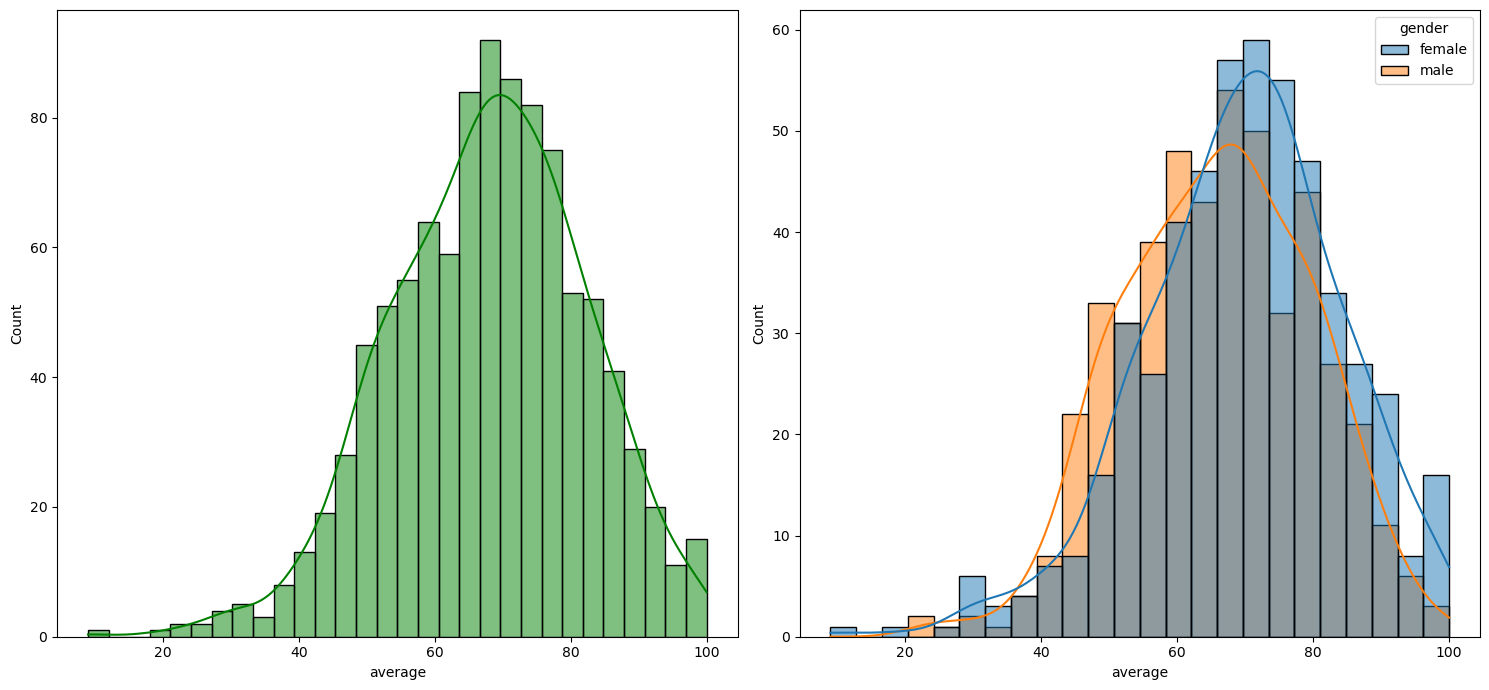

In [14]:
fig, ax = plt.subplots(1,2, figsize= (15,7))

plt.subplot(121)
sns.histplot(data= df, x = 'average', bins= 30, kde= True, color= 'g')

plt.subplot(122)
sns.histplot(data= df, x = 'average', kde= True, hue= 'gender')

plt.tight_layout()
plt.show()

### Insight

- Female students tend to perform well than male students

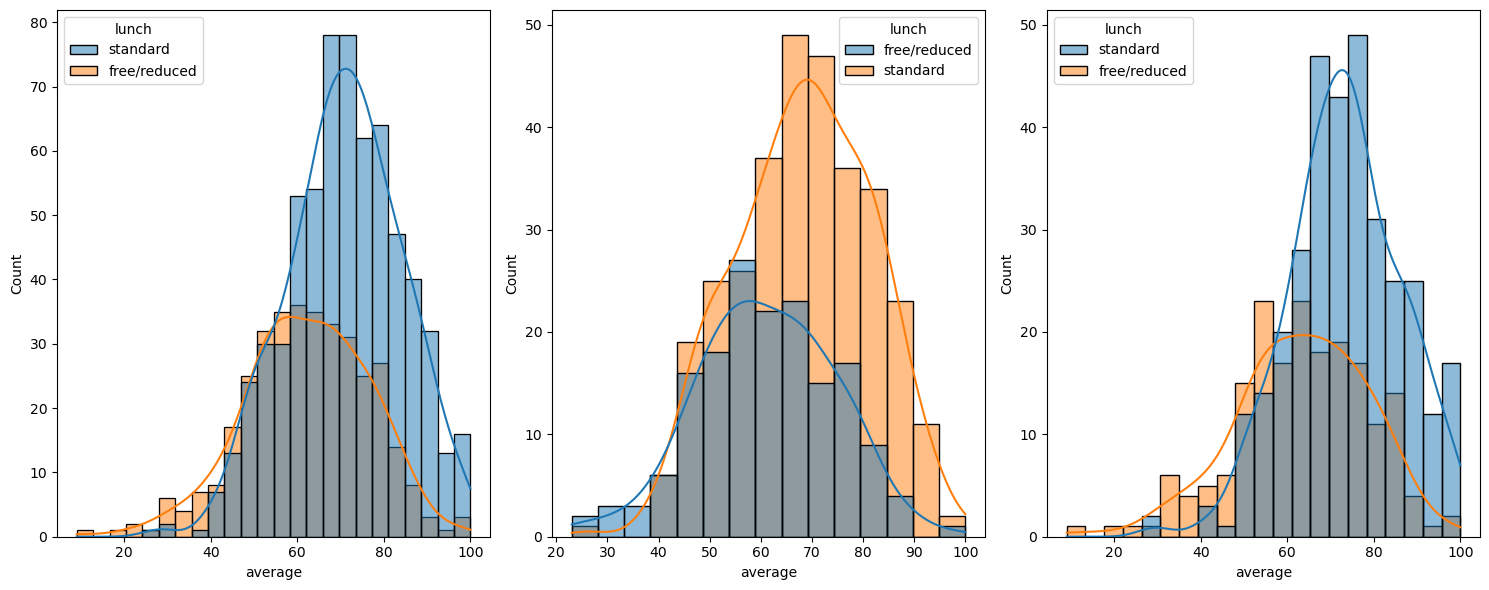

In [15]:
fig, ax = plt.subplots(1,3, figsize= (15,6))

sns.histplot(data= df, x = 'average', kde= True, hue= 'lunch', ax = ax[0])

sns.histplot(data= df[df['gender'] == 'male'], x = 'average', kde= True, hue= 'lunch', ax = ax[1])

sns.histplot(data= df[df['gender'] == 'female'], x = 'average', kde= True, hue= 'lunch', ax = ax[2])

plt.tight_layout()
plt.show()

### Insights

- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

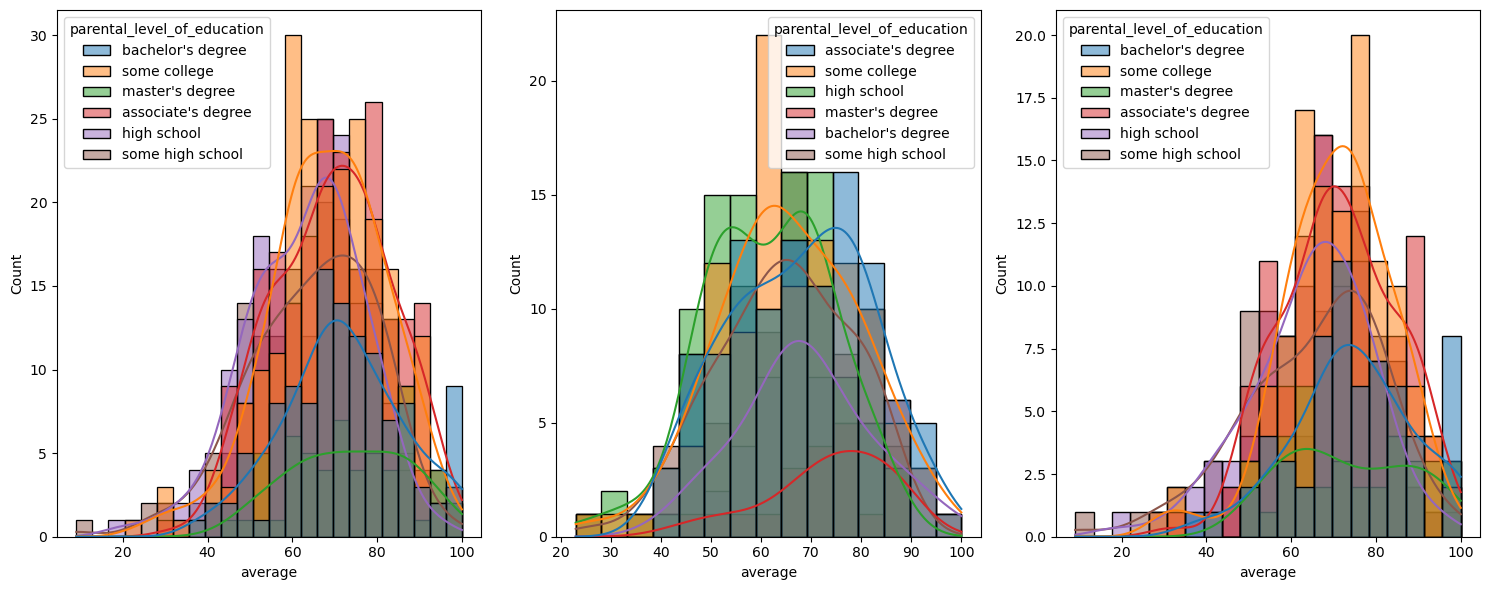

In [16]:
fig, ax = plt.subplots(1,3, figsize= (15,6))

sns.histplot(data= df, x = 'average', kde= True, hue= 'parental_level_of_education', ax = ax[0])

sns.histplot(data= df[df['gender'] == 'male'], x = 'average', kde= True, hue= 'parental_level_of_education', ax = ax[1])

sns.histplot(data= df[df['gender'] == 'female'], x = 'average', kde= True, hue= 'parental_level_of_education', ax = ax[2])

plt.tight_layout()
plt.show()

### Insights

- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

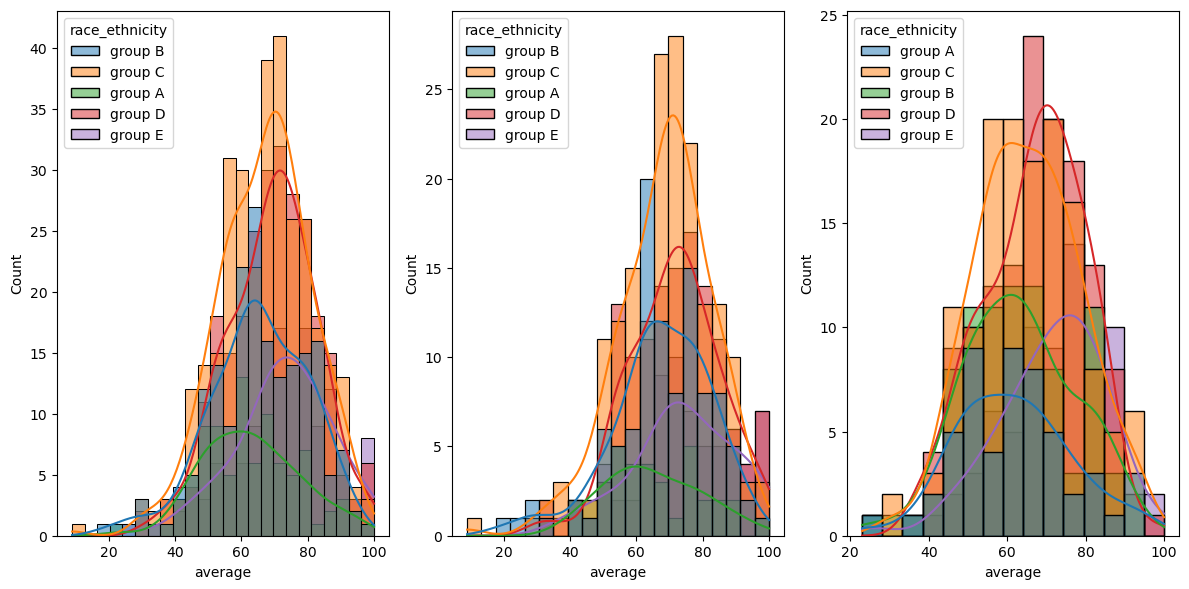

In [31]:
fig, ax = plt.subplots(1,3,figsize= (12,6))

sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity', ax = ax[0])

sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity', ax = ax[1])

sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity', ax = ax[2])

plt.tight_layout()
plt.show()

### Insights

- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

## 4.2 Maximumum score of students in all three subjects

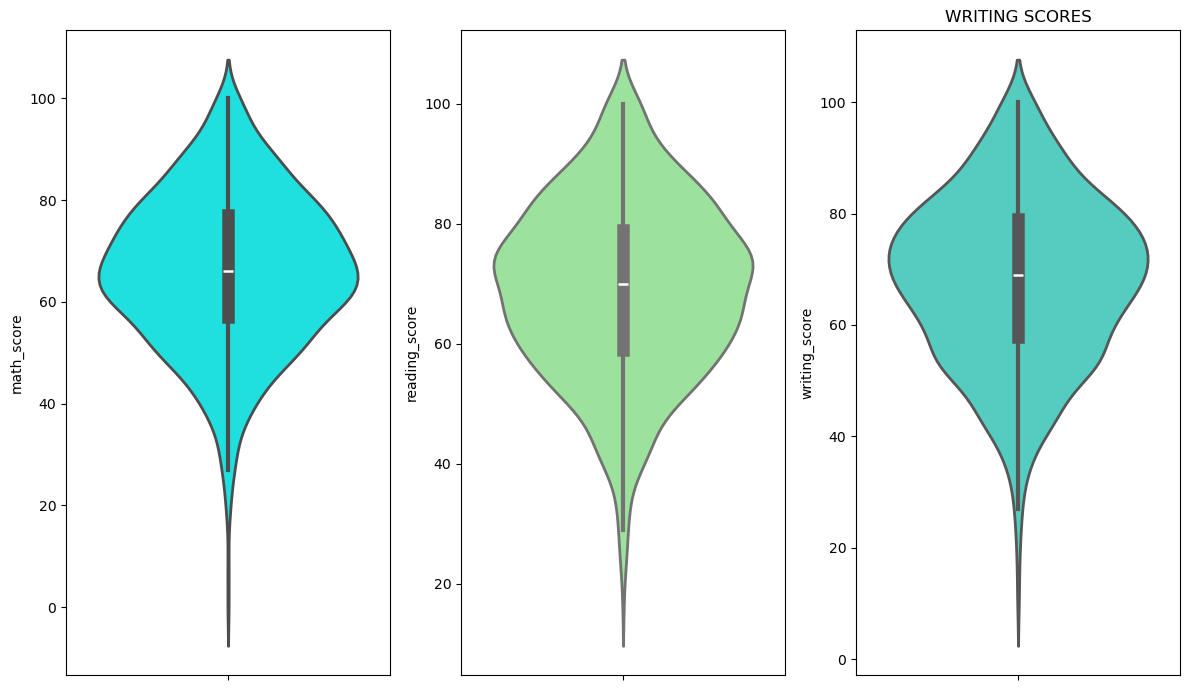

In [42]:
fig, ax = plt.subplots(1,3,figsize= (12,7))

plt.title('MATH SCORES')
sns.violinplot(y= 'math_score', data= df, color= 'cyan', linewidth= 2, ax= ax[0])

plt.title('READING SCORES')
sns.violinplot(y= 'reading_score', data= df, color= 'lightgreen', linewidth= 2, ax= ax[1])

plt.title('WRITING SCORES')
sns.violinplot(y= 'writing_score', data= df, color= 'turquoise', linewidth= 2, ax= ax[2])

plt.tight_layout()
plt.show()

### Insights

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-8

## 4.3 Multivariate analysis using pieplot

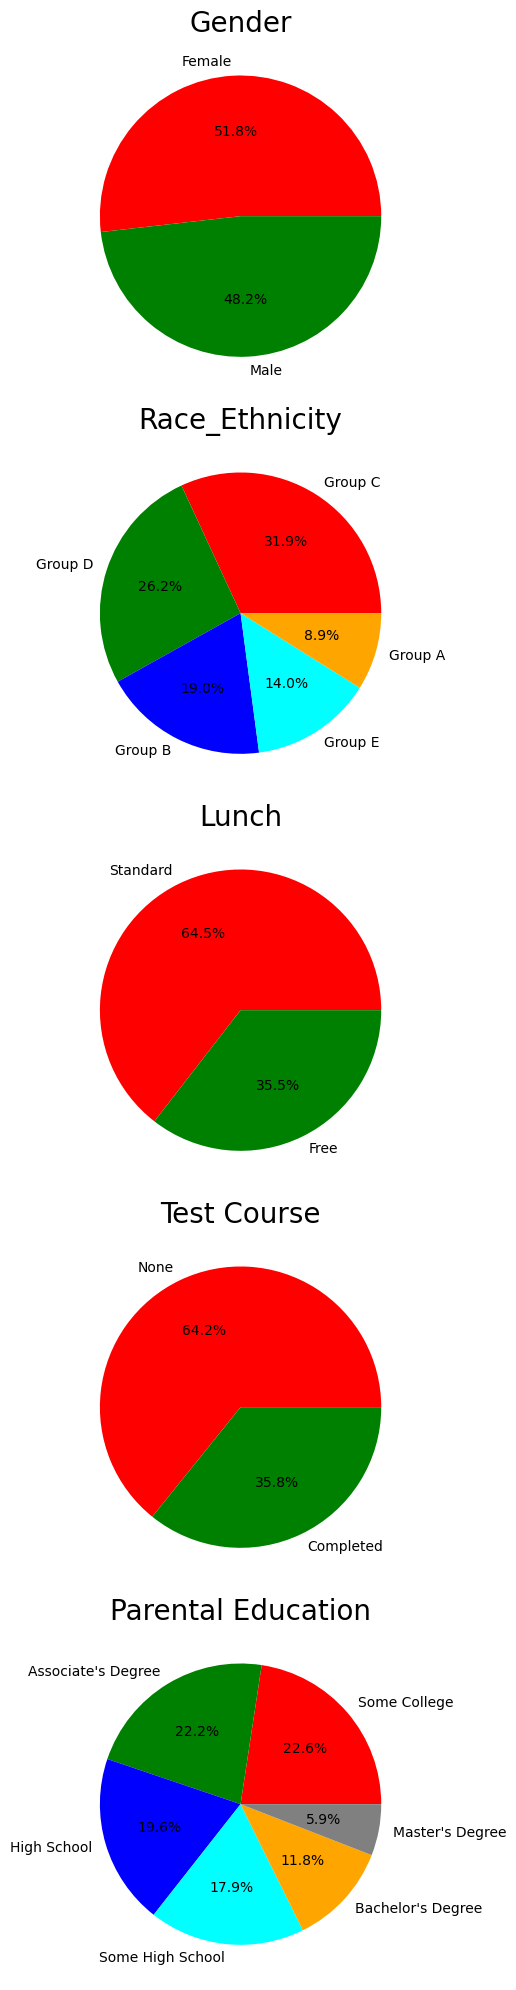

In [72]:
fig, ax = plt.subplots(5,1)

plt.rcParams['figure.figsize'] = (30, 20)

size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

ax[0].pie(size, colors = color, labels = labels, autopct = '%2.1f%%')
ax[0].set_title('Gender', fontsize = 20)
ax[0].axis('off')



size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

ax[1].pie(size, colors = color,labels = labels,autopct = '%2.1f%%')
ax[1].set_title('Race_Ethnicity', fontsize = 20)
ax[1].axis('off')



size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

ax[2].pie(size, colors = color,labels = labels,autopct = '%2.1f%%')
ax[2].set_title('Lunch', fontsize = 20)
ax[2].axis('off')



size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

ax[3].pie(size, colors = color,labels = labels,autopct = '%2.1f%%')
ax[3].set_title('Test Course', fontsize = 20)
ax[3].axis('off')



size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

ax[4].pie(size, colors = color,labels = labels,autopct = '%2.1f%%')
ax[4].set_title('Parental Education', fontsize = 20)
ax[4].axis('off')



plt.tight_layout()
plt.grid()

plt.show()

### Insights

- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization

#### 4.4.1 GENDER COLUMN

- How is distribution of Gender ?
- Does gender has any impact on students performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

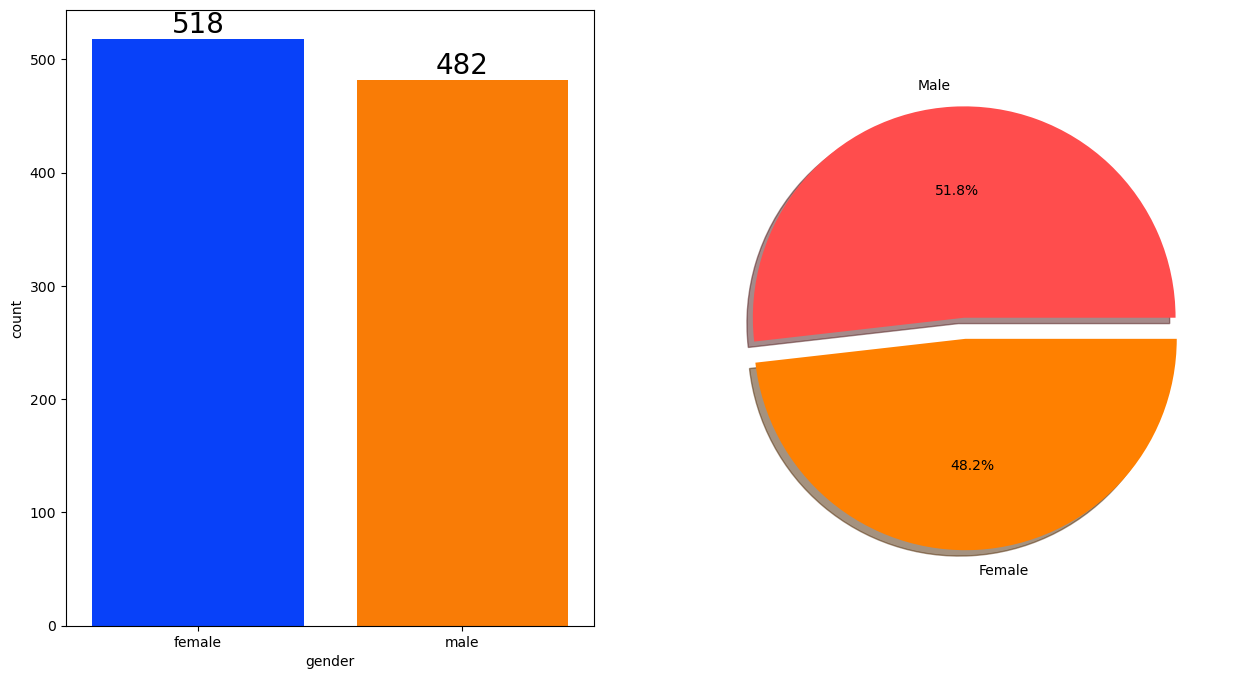

In [75]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

sns.countplot(x= df['gender'], data= df, palette= 'bright', ax= ax[0], saturation= 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x= df['gender'].value_counts(), labels= ['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])

plt.show()

### Insights

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

#### BIVARIATE ANALYSIS ( Does gender has any impact on student's performance ? )

In [91]:
gender_group = df.groupby('gender')[['average', 'math_score']].mean()
gender_group

,average,math_score
gender,,
female,69.569498,63.633205
male,65.837483,68.728216


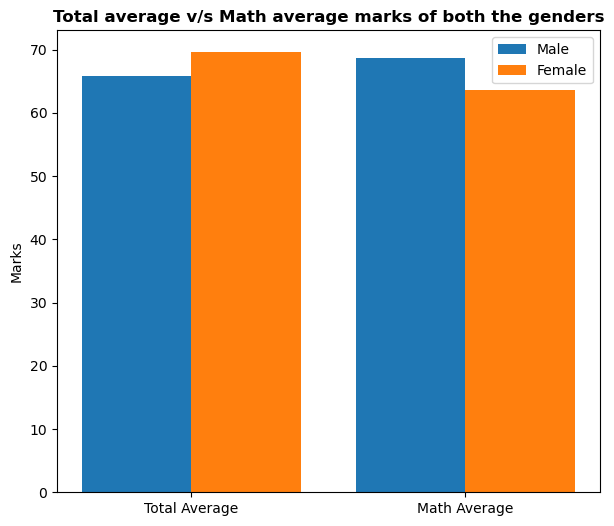

In [94]:
plt.figure(figsize=(7, 6))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

### Insights

- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN

- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

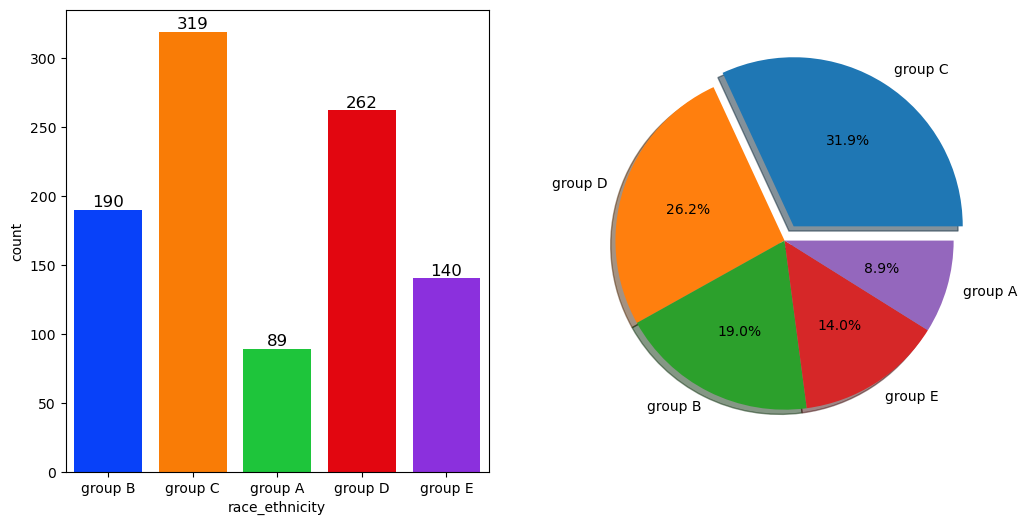

In [99]:
fig, ax = plt.subplots(1,2,figsize= (12,6))

sns.countplot(x= df['race_ethnicity'], data= df, palette= 'bright', ax= ax[0], saturation= 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color= 'black', size= 12)
    
plt.pie(x= df['race_ethnicity'].value_counts(), labels= df['race_ethnicity'].value_counts().index, explode= [0.1,0,0,0,0], autopct= '%1.1f%%', shadow= True)
plt.show()   

### Insights

- Most of the student belonging from group C/ group D.
- Lowest number of students belong to group A

### BIVARIATE ANALYSIS ( Does Race/Ehnicity has any impact on student's performance ? )

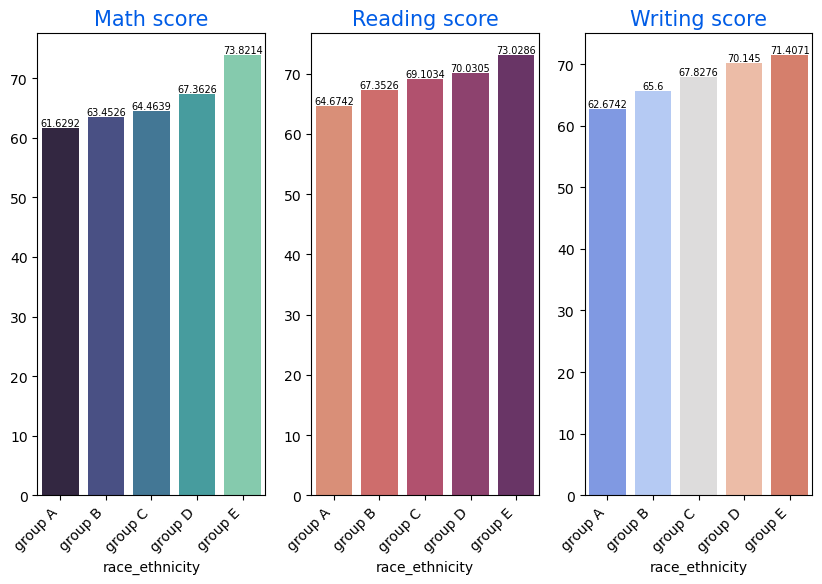

In [134]:
Group_data2 = df.groupby('race_ethnicity')

fig, ax = plt.subplots(1,3, figsize= (10,6))

sns.barplot(x= Group_data2['math_score'].mean().index, y= Group_data2['math_score'].mean().values, palette= 'mako', ax= ax[0])
ax[0].set_title('Math score', color= '#005ce6', size= 15)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

for container in ax[0].containers:
    ax[0].bar_label(container, color= 'black', size= 7)

sns.barplot(x=Group_data2['reading_score'].mean().index, y= Group_data2['reading_score'].mean().values, palette= 'flare', ax= ax[1])
ax[1].set_title('Reading score', color= '#005ce6', size= 15)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

for container in ax[1].containers:
    ax[1].bar_label(container, color= 'black', size= 7)

sns.barplot(x=Group_data2['writing_score'].mean().index, y= Group_data2['writing_score'].mean().values, palette= 'coolwarm', ax= ax[2])
ax[2].set_title('Writing score', color= '#005ce6', size= 15)
for tick in ax[2].get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

for container in ax[2].containers:
    ax[2].bar_label(container, color= 'black', size= 7)

### Insights

- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

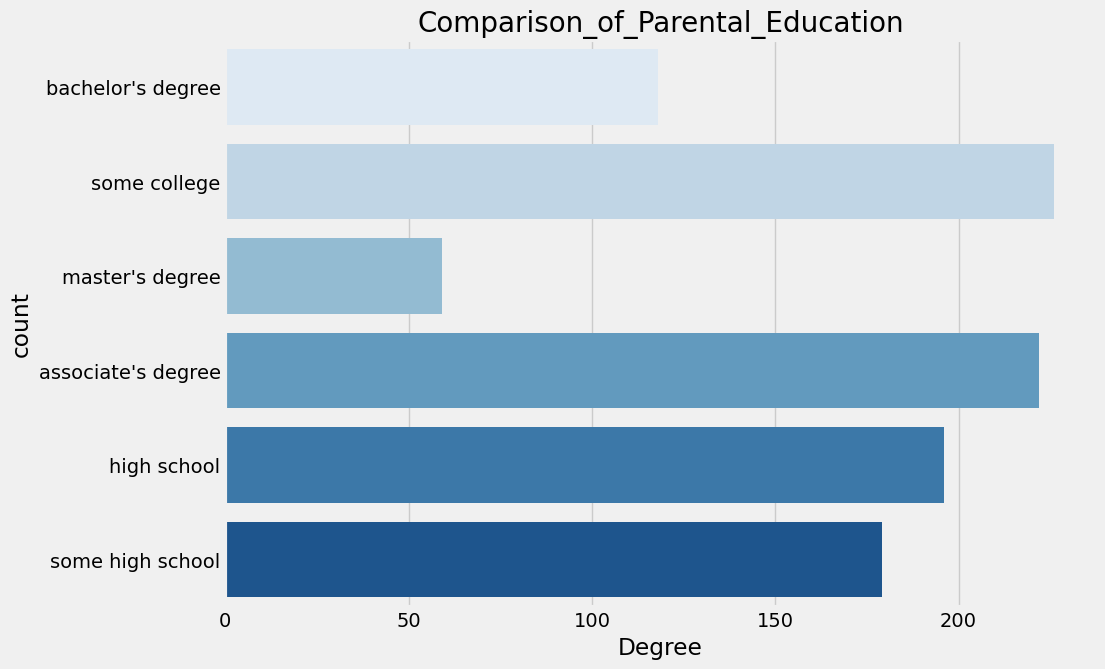

In [136]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('fivethirtyeight')

sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison_of_Parental_Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

### Insights

- Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Does parental education has any impact on student's performance ? )

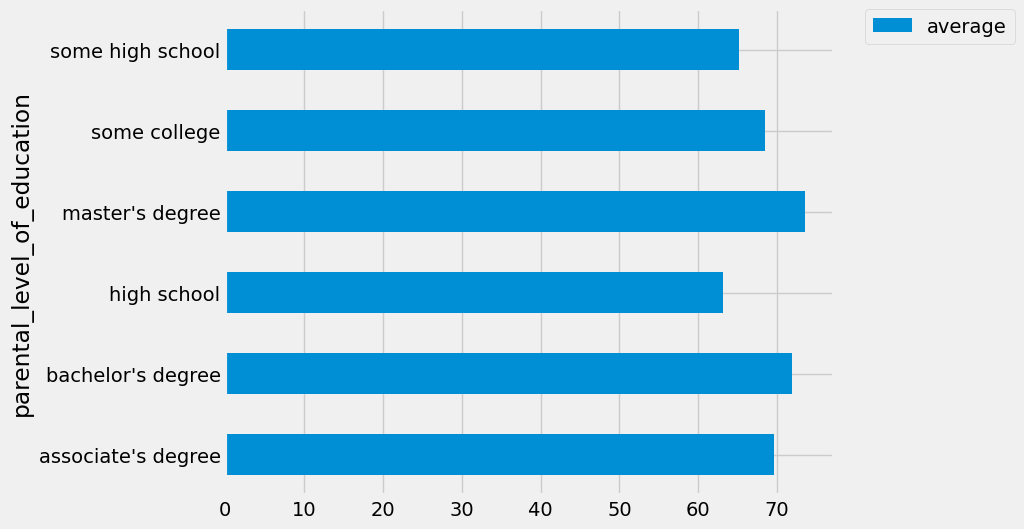

In [141]:
df.groupby('parental_level_of_education')[['average']].agg('mean').plot(kind='barh',figsize=(7,6))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights

- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN

- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

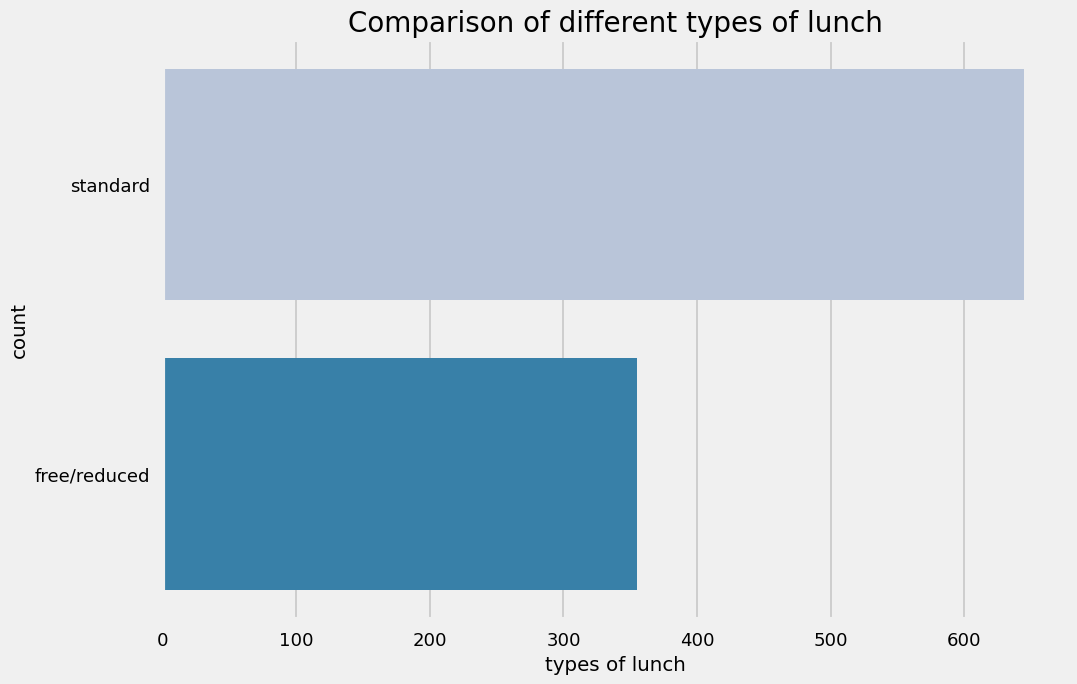

In [152]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('seaborn-v0_8-talk')

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

### Insights

- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Does lunch type intake has any impact on student's performance ? )

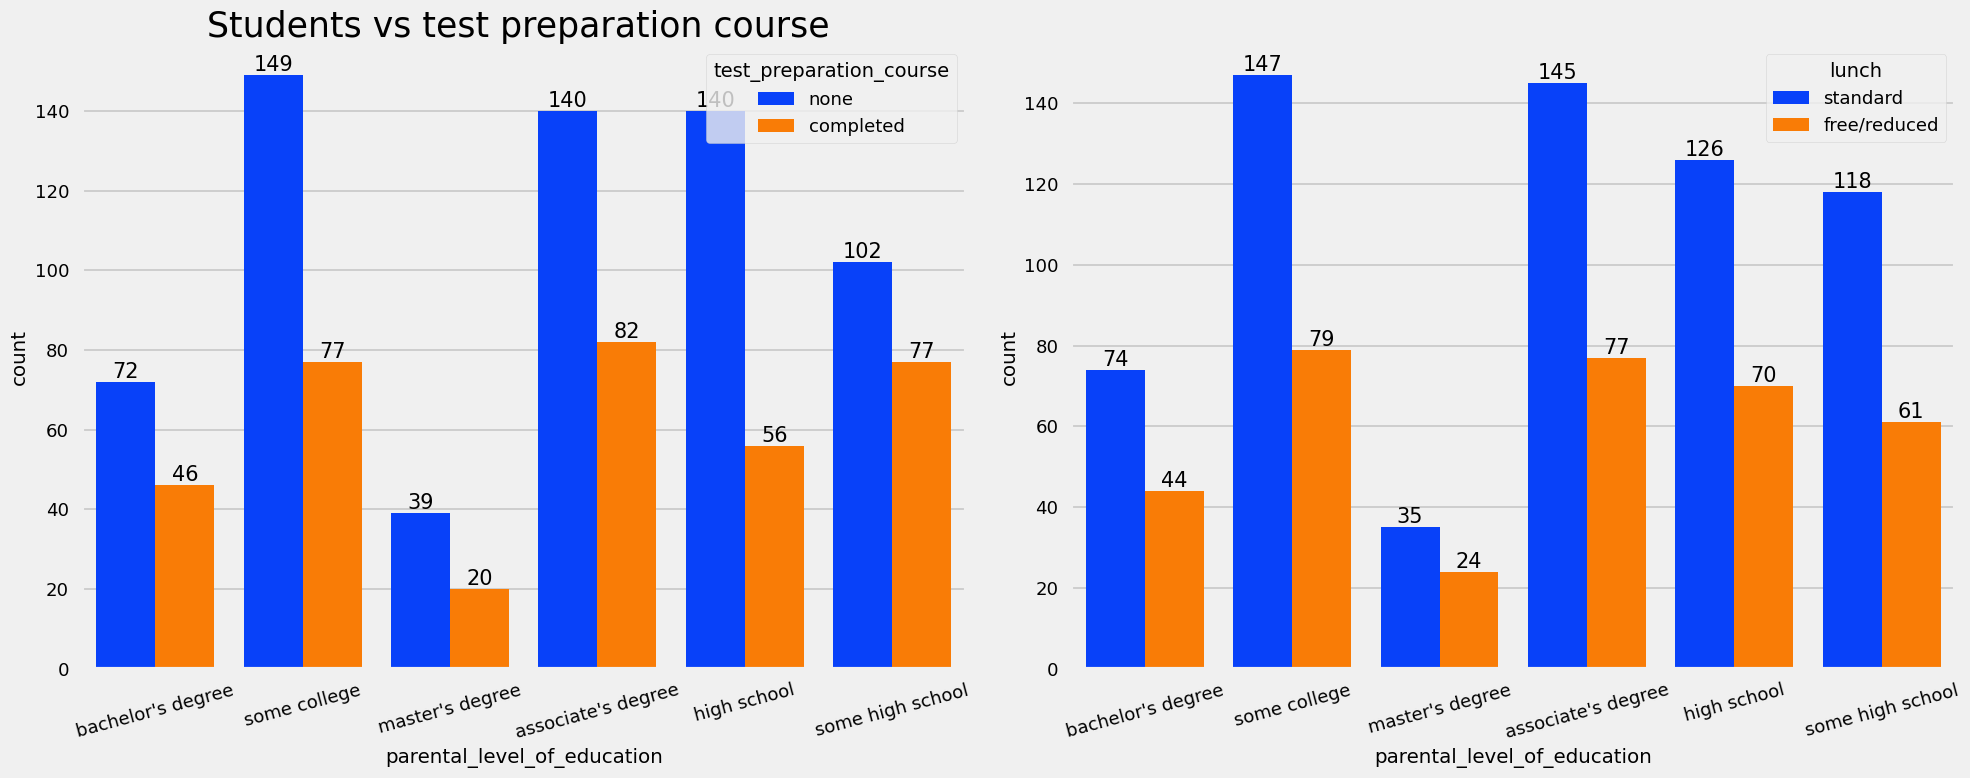

In [169]:
fig, ax = plt.subplots(1,2,figsize= (20,8))

sns.countplot(x=df['parental_level_of_education'], data= df, palette= 'bright', hue= 'test_preparation_course', saturation= 0.95, ax= ax[0])
ax[0].set_title('Students vs test preparation course ', color= 'black', size= 25)
for tick in ax[0].get_xticklabels():
    tick.set_rotation(15)
    # tick.set_ha('right')
for container in ax[0].containers:
    ax[0].bar_label(container, color= 'black', size= 15)
    
sns.countplot(x= df['parental_level_of_education'], data= df, palette= 'bright', hue= 'lunch', saturation= 0.95, ax= ax[1])
for tick in ax[1].get_xticklabels():
    tick.set_rotation(15)
    # tick.set_ha('right')
for container in ax[1].containers:
    ax[1].bar_label(container, color= 'black', size= 15)
    
    

plt.tight_layout()
plt.show()

### Insights

- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN

- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Does Test prepration course has any impact on student's performance ? )

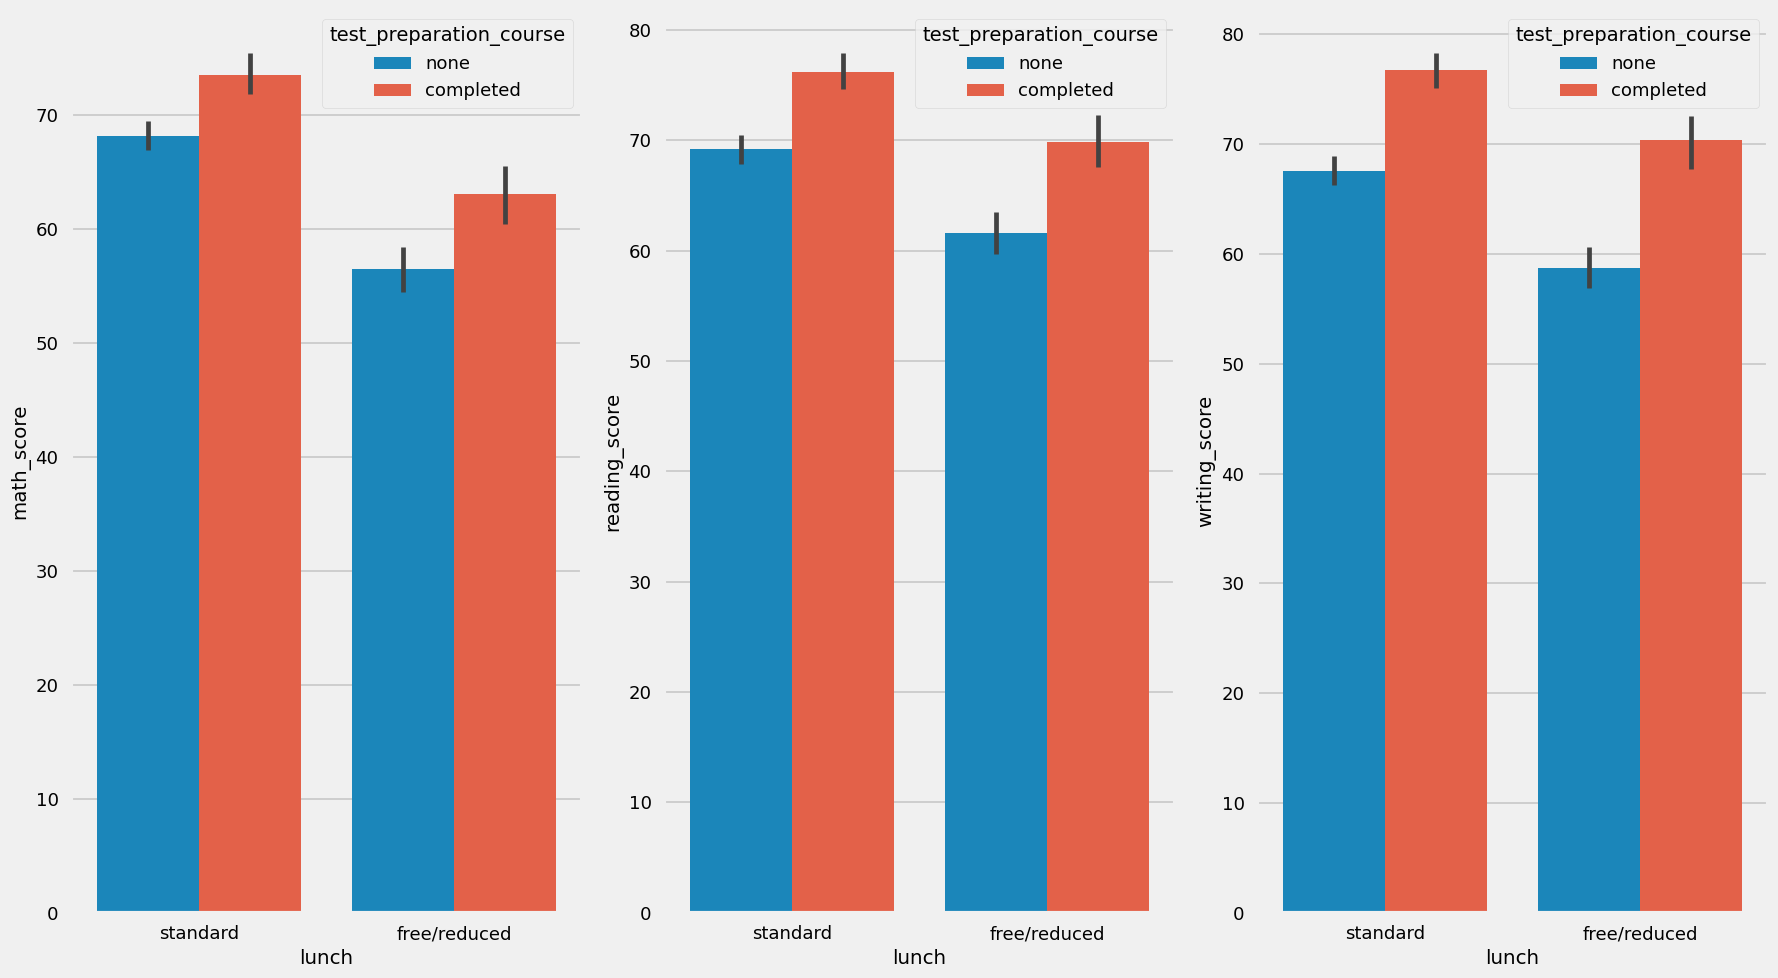

In [175]:
fig, ax = plt.subplots(1,3, figsize=(18,10))

sns.barplot(x= df['lunch'], y= df['math_score'], hue= df['test_preparation_course'], ax= ax[0])

sns.barplot(x= df['lunch'], y= df['reading_score'], hue= df['test_preparation_course'], ax= ax[1])

sns.barplot(x= df['lunch'], y= df['writing_score'], hue= df['test_preparation_course'], ax= ax[2])

plt.tight_layout()
plt.show()

### Insights

- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

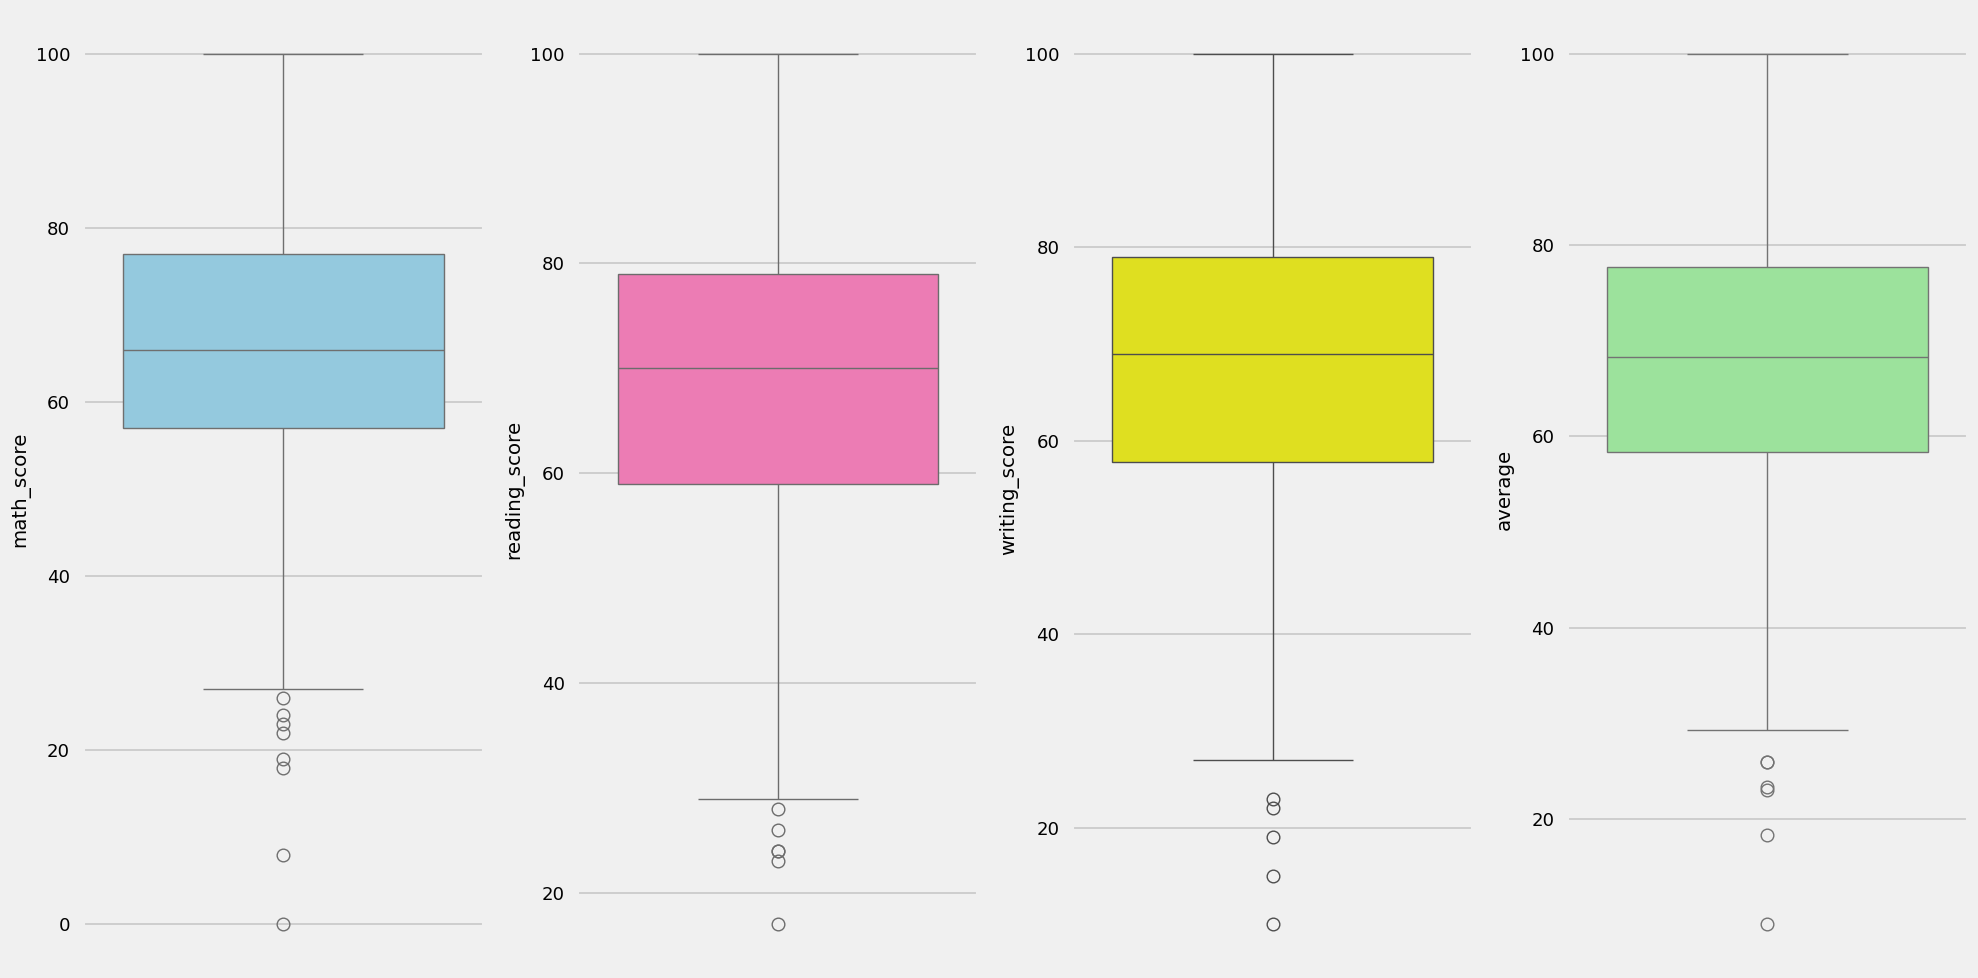

In [180]:
fig, ax = plt.subplots(1,4,figsize=(20,10))

sns.boxplot(df['math_score'],color='skyblue', ax= ax[0])

sns.boxplot(df['reading_score'],color='hotpink', ax= ax[1])

sns.boxplot(df['writing_score'],color='yellow', ax= ax[2])

sns.boxplot(df['average'],color='lightgreen', ax= ax[3])

plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

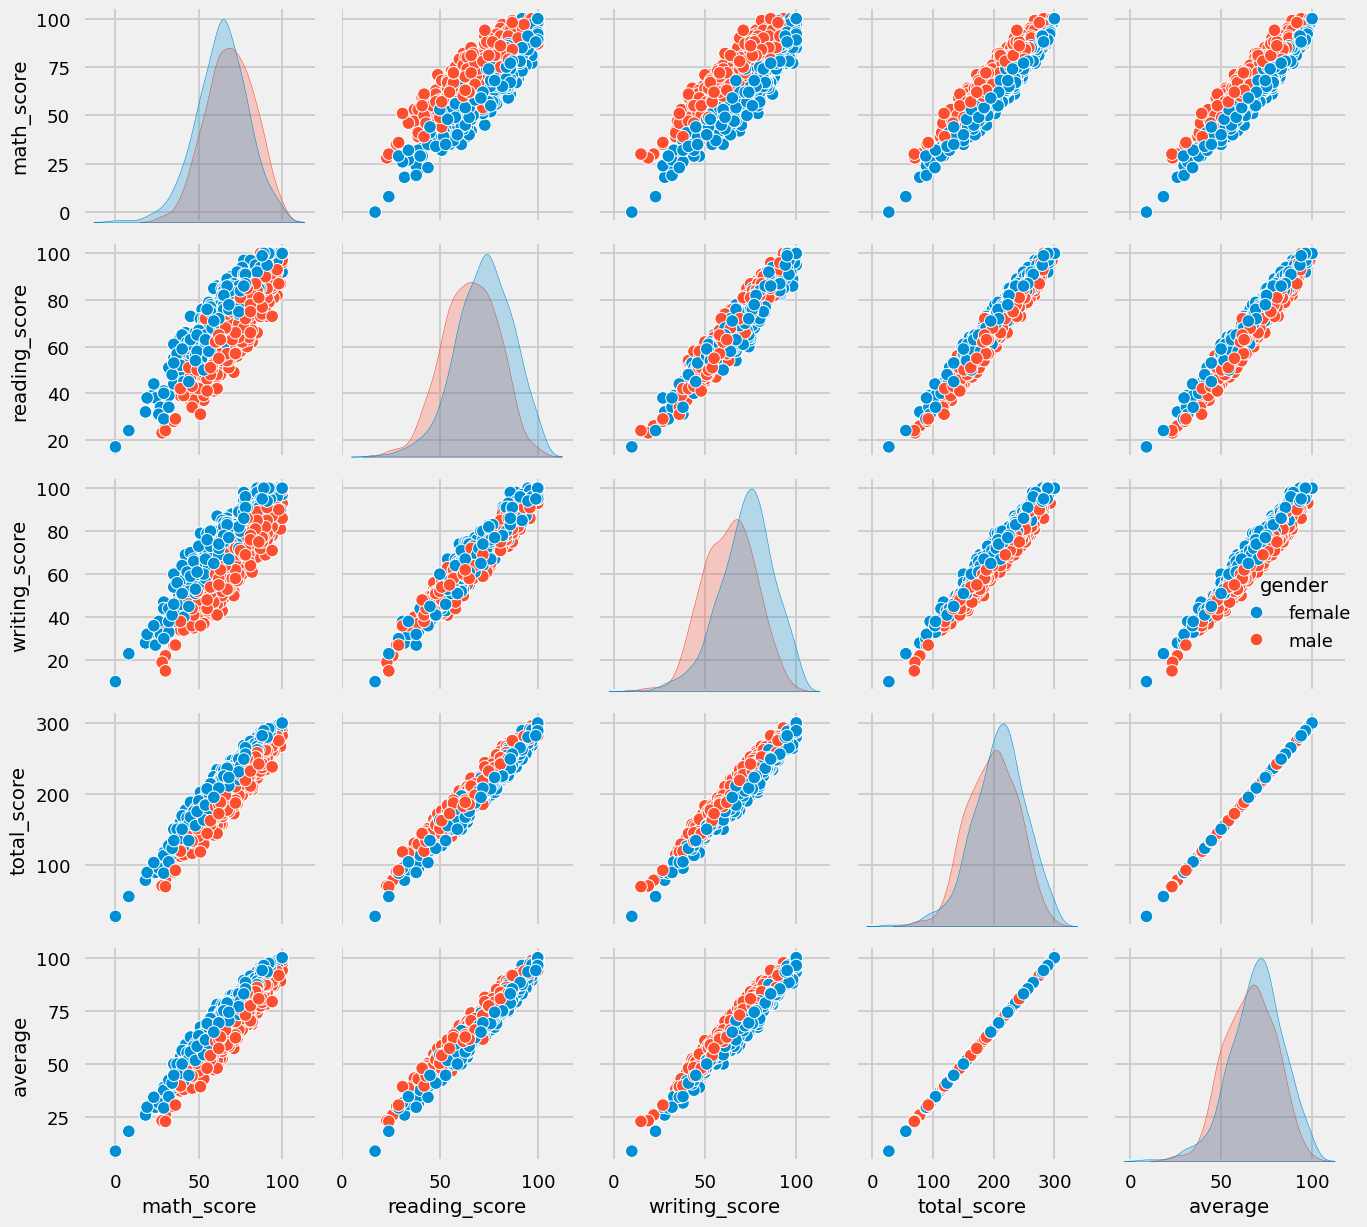

In [182]:
sns.pairplot(df,hue = 'gender')

plt.tight_layout()
plt.show()

### Insights

- From the above plot it is clear that all the scores increase linearly with each other.

## 5. Conclusions

- Students Performance is related and influenced with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers.
- Students Performance is not much related with test preparation course.

- Finishing preparation course is benefitial.